# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. DataFrames

In [2]:
import pandas as pd
from openpyxl import load_workbook

workbook = load_workbook('Data_Train.xlsx')

sheet = workbook.active

train_data = pd.DataFrame(sheet.values, columns=[cell.value for cell in sheet[1]])
train_data =train_data.drop(0).reset_index(drop=True)

train_data.to_excel('Yeni_Dosya.xlsx', index=False)

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


lets deal missing values(data cleaning)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  object
dtypes: object(11)
memory usage: 918.2+ KB


In [6]:
train_data['Price'] = train_data['Price'].astype('int64')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# 3. Check Nulls

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# 5. Data Cleaning - Total Stops

In [9]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [10]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,None,09:45,09:25 07 May,23h 40m,None,No info,7480


In [11]:
train_data.dropna(inplace=True)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.2 MB


# #Perform data-preprocessing & extract derived Features

In [14]:
t_data=train_data.copy()

In [15]:
t_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
t_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
def datetime(col):
    t_data[col]=pd.to_datetime(t_data[col])

In [18]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
t_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [20]:
for index in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    datetime(index)

In [21]:
t_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
t_data["journey_day"]=t_data['Date_of_Journey'].dt.day

In [23]:
t_data["Journey_month"]=t_data['Date_of_Journey'].dt.month

In [24]:
t_data["Journey_year"]=t_data['Date_of_Journey'].dt.year

In [25]:
t_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-23 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-23 05:50:00,2024-01-23 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-23 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-01-23 18:05:00,2024-01-23 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-01-23 16:50:00,2024-01-23 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [26]:
def hour_min(df,col):
    df[col+"hour"]=df[col].dt.hour
    df[col+"minute"]=df[col].dt.minute
    return df.head(3)

In [27]:
t_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [28]:
hour_min(t_data,"Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-23 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-23 05:50:00,2024-01-23 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-23 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [29]:
hour_min(t_data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-23 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-23 05:50:00,2024-01-23 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-23 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [30]:
t_data.drop('Arrival_Time',axis=1,inplace=True)

In [31]:
t_data.drop('Dep_Time',axis=1,inplace=True)

In [32]:
t_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [33]:
t_data.shape

(10682, 16)

# Let's predict when the flights will take off.

In [34]:
def dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "late night"
        

<AxesSubplot:>

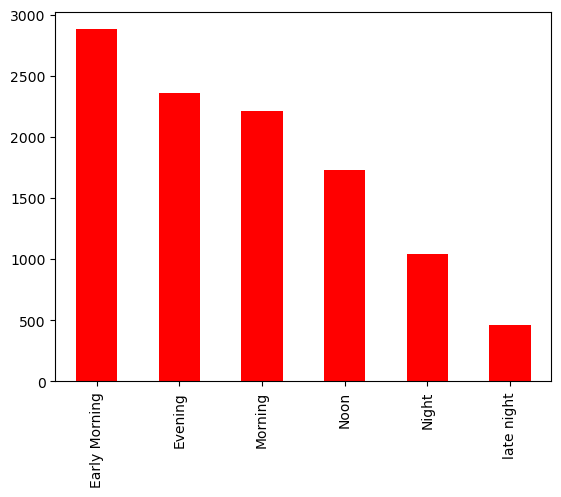

In [35]:
t_data['Dep_Timehour'].apply(dep_time).value_counts().plot(kind="bar",color="r")

In [36]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [37]:
t_data['Dep_Timehour'].apply(dep_time).value_counts().iplot(kind="bar")

In [38]:
t_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [39]:
def duration(x):
    if 'h' not in x:
        x='0h'+' '+ x
    elif 'm' not in x:
        x= x +' '+ '0m'
        
    return x   
    

In [40]:
t_data['Duration']=t_data['Duration'].apply(duration)

In [41]:
t_data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [42]:
t_data['Duration_hour']=t_data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [43]:
t_data['Duration_min']=t_data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [44]:
t_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month,Journey_year,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


# Let's check if the duration has an impact on the price.

In [45]:
t_data['total_min']=t_data['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m','*1').apply(eval)

In [46]:
t_data['total_min']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: total_min, Length: 10682, dtype: int64

<AxesSubplot:xlabel='total_min', ylabel='Price'>

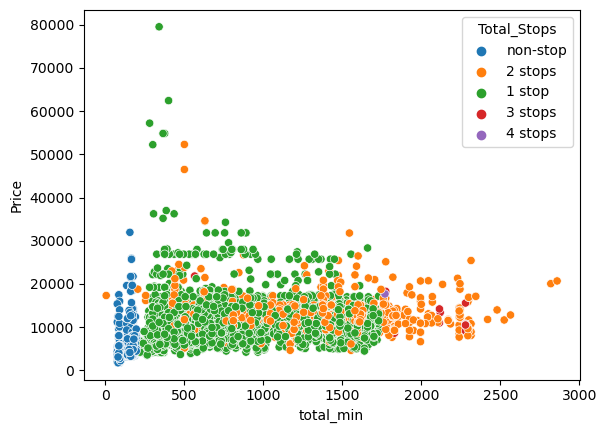

In [47]:
sns.scatterplot(x="total_min",y="Price",hue="Total_Stops",data=t_data)

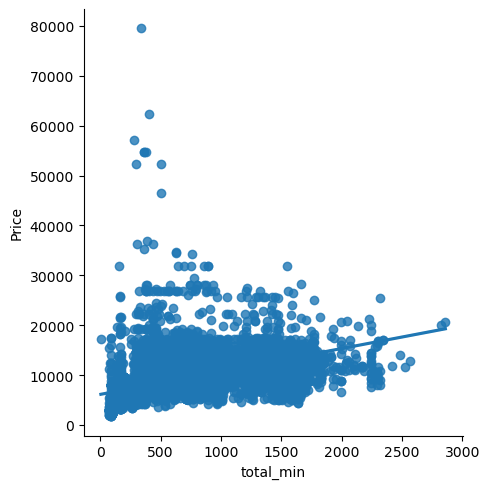

In [48]:
sns.lmplot(x="total_min",y="Price",data=t_data)

# on which route jet airways is extremely used
#Airline vs Price

In [49]:
t_data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [50]:
t_data[t_data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
BOM → BDQ → DEL → HYD      2
DEL → DED → BOM → COK      2
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

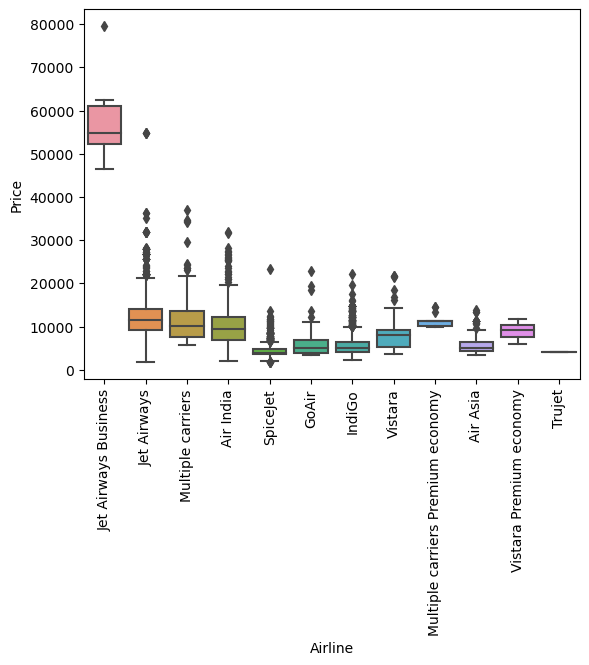

In [51]:
sns.boxplot(x='Airline',y='Price',data=t_data.sort_values('Price',ascending=False))
plt.xticks(rotation="vertical")
plt.show()

# ONE-HOT ENCODING

In [52]:
cat_col=[col for col in t_data.columns if t_data[col].dtype=="object"]

In [53]:
num_col=[col for col in t_data.columns if t_data[col].dtype!="object"]

In [54]:
t_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [55]:
t_data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [56]:
for cat_sub in t_data['Source'].unique():
    t_data['Source_'+cat_sub]=t_data['Source'].apply(lambda x : 1 if x==cat_sub else 0)
    

In [57]:
t_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_min,total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,23,30,5,25,325,0,1,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,21,35,4,45,285,1,0,0,0,0


# Lets perform target guided encoding in data
#Perform manual encoding on data


In [58]:
t_data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [59]:
airlines=t_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [60]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [61]:
dict_={key:index for index,key in enumerate (airlines,0)}

In [62]:
dict_

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [63]:
t_data['Airline']=t_data['Airline'].map(dict_)

In [64]:
t_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_min,total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [65]:
t_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [66]:
t_data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [67]:
desti=t_data.groupby(['Destination'])['Price'].mean().sort_values().index

In [68]:
dict_desti={key:index for index,key in enumerate (desti,0)}

In [69]:
dict_desti

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [70]:
t_data['Destination']=t_data['Destination'].map(dict_desti)

In [71]:
t_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_min,total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


# perfom manuel encoding on data-remove un necessary features


In [72]:
t_data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [73]:
t_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

# ORDINAL DATA LABEL ENCODING

In [74]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [75]:
t_data['Total_Stops']=t_data['Total_Stops'].map(stop)

In [76]:
t_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,...,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_min,total_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [77]:
t_data['Additional_Info'].value_counts()/len(t_data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
Red-eye flight                   0.009362
2 Long layover                   0.009362
1 Short layover                  0.009362
Name: Additional_Info, dtype: float64

In [78]:
t_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'Journey_month', 'Journey_year', 'Dep_Timehour', 'Dep_Timeminute',
       'Arrival_Timehour', 'Arrival_Timeminute', 'Duration_hour',
       'Duration_min', 'total_min', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [79]:
t_data['Journey_year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Journey_year, Length: 10682, dtype: int64

In [80]:
t_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'Journey_month', 'Journey_year', 'Dep_Timehour', 'Dep_Timeminute',
       'Arrival_Timehour', 'Arrival_Timeminute', 'Duration_hour',
       'Duration_min', 'total_min', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [81]:
t_data.drop(columns=['Date_of_Journey','Source','Additional_Info','total_min','Journey_year'],axis=1,inplace=True)

In [82]:
t_data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'Journey_month', 'Dep_Timehour', 'Dep_Timeminute',
       'Arrival_Timehour', 'Arrival_Timeminute', 'Duration_hour',
       'Duration_min', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [83]:
t_data.drop(columns=['Route'],axis=1,inplace=True)

In [84]:
t_data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,journey_day,Journey_month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [85]:
t_data.drop(columns=['Duration'],axis=1,inplace=True)

In [86]:
t_data.head(3)

,Airline,Destination,Total_Stops,Price,journey_day,Journey_month,Dep_Timehour,Dep_Timeminute,Arrival_Timehour,Arrival_Timeminute,Duration_hour,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


# Outliers

In [87]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

    plt.show()

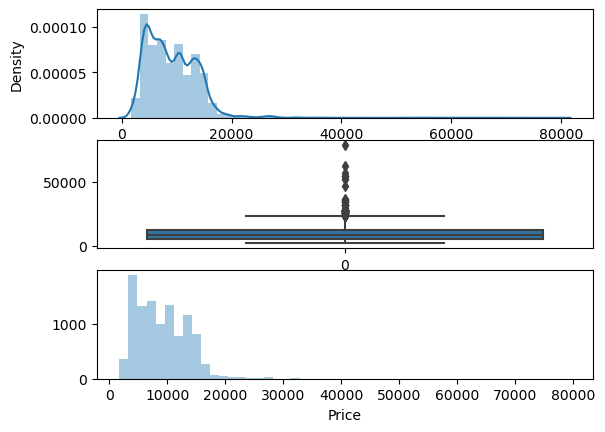

In [88]:
plot(t_data,'Price')

In [89]:
q1=t_data['Price'].quantile(0.25)
q3=t_data['Price'].quantile(0.75)

iqr=q3- q1

maxi=q3 + 1.5*iqr
mini=q1 - 1.5*iqr

In [90]:
print(maxi)

23017.0


In [91]:
print(mini)

-5367.0


In [92]:
print([price for price in t_data['Price'] if price>maxi or price<mini])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [93]:
len([price for price in t_data['Price'] if price > maxi or price < mini])

94

In [94]:
t_data['Price']=np.where(t_data['Price'] >=35000 ,t_data['Price'].median() , t_data['Price'])

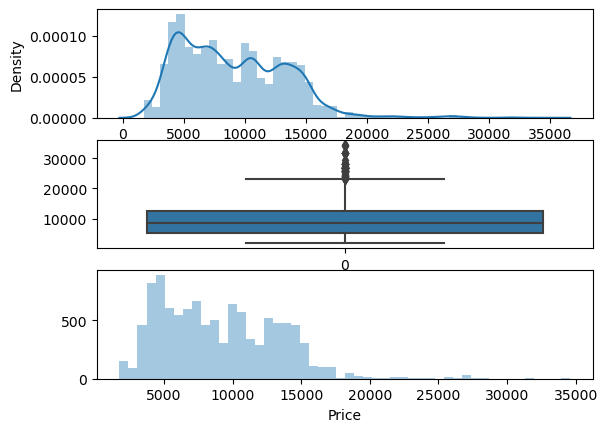

In [95]:
plot(t_data,'Price')

In [96]:
#lets perform feature selection

In [97]:
X=t_data.drop(['Price'], axis=1)

In [98]:
y=t_data['Price']

In [99]:
from sklearn.feature_selection import mutual_info_regression

In [100]:
reg=mutual_info_regression(X,y)

In [101]:
reg

array([0.96949543, 1.00745463, 0.79138478, 0.19489144, 0.24212518,
       0.33238612, 0.2571415 , 0.39837876, 0.34459926, 0.46713068,
       0.34749735, 0.38558711, 0.45432189, 0.517338  , 0.13694901,
       0.19383824])

In [102]:
reg_d=pd.DataFrame(reg,index=X.columns)

In [103]:
reg_d

,0
Airline,0.969495
Destination,1.007455
Total_Stops,0.791385
journey_day,0.194891
Journey_month,0.242125
Dep_Timehour,0.332386
Dep_Timeminute,0.257141
Arrival_Timehour,0.398379
Arrival_Timeminute,0.344599
Duration_hour,0.467131


In [104]:
reg_d.columns=['Value']

In [105]:
reg_d

,Value
Airline,0.969495
Destination,1.007455
Total_Stops,0.791385
journey_day,0.194891
Journey_month,0.242125
Dep_Timehour,0.332386
Dep_Timeminute,0.257141
Arrival_Timehour,0.398379
Arrival_Timeminute,0.344599
Duration_hour,0.467131


In [106]:
reg_d.sort_values(by='Value')

,Value
Source_Chennai,0.136949
Source_Mumbai,0.193838
journey_day,0.194891
Journey_month,0.242125
Dep_Timeminute,0.257141
Dep_Timehour,0.332386
Arrival_Timeminute,0.344599
Duration_min,0.347497
Source_Banglore,0.385587
Arrival_Timehour,0.398379


# ML MODEL

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
reg_model=RandomForestRegressor()

In [111]:
reg_model.fit(X_train,y_train)

RandomForestRegressor()

In [112]:
y_pred=reg_model.predict(X_test)

In [113]:
y_pred

array([16685.93,  6203.05,  8827.44, ...,  3531.37,  6359.52,  6956.2 ])

In [114]:
from sklearn import metrics

In [115]:
metrics.r2_score(y_test,y_pred)

0.8052164457437875

In [116]:
import pickle

In [117]:
file=open(r'C:\Users\dell\Desktop\hugginface/rf_random.pkl','wb')

In [118]:
pickle.dump(reg_model,file)

In [119]:
model=open(r'C:\Users\dell\Desktop\hugginface/rf_random.pkl','rb')

In [120]:
forest=pickle.load(model)

In [121]:
y_pred2=forest.predict(X_test)

In [122]:
metrics.r2_score(y_test,y_pred2)

0.8052164457437875

In [123]:
#evaluation model

In [124]:
def mape(y_true,y_pred):
    y_true,y_pred =np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)) / y_true)*100


In [125]:
mape(y_test,y_pred)

13.271750330987414

In [126]:
#automate ml pipeline

In [127]:
from sklearn import metrics

In [128]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are :{}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print('MAPE : {}'.format(mape(y_test,y_prediction)))
    sns.distplot(y_test - y_prediction)
        

# Fitting model using Random Forest
1-Split dataset into train and test set in order to prediction w.r.t X_test
2-If needed do data scaling Scaling is not done in Random forest
3-Import model
4-Fit the data
5-Predict w.r.t X_test 6.In regression check RSME Score
6-Plot graph

Training score: 0.9516682103004478
predictions are :[16732.97  6222.16  8853.02 ...  3515.35  6205.02  6971.36]


r2 score : 0.8045718661805419
MAE : 1189.0945410220836
MSE : 3804516.6725593205
RMSE : 1950.5170269852351
MAPE : 13.330563984308494


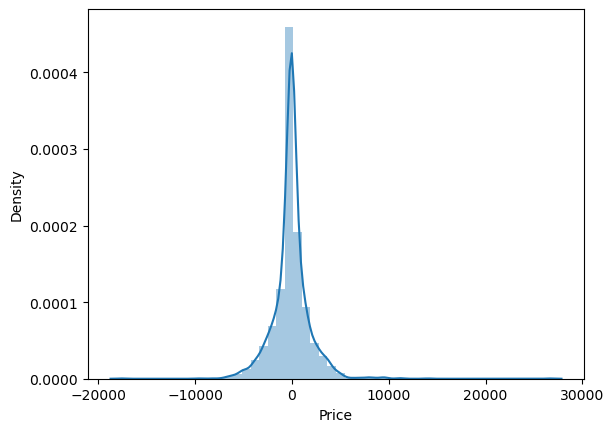

In [129]:
predict(RandomForestRegressor())

In [130]:
from sklearn.tree import DecisionTreeRegressor

Training score: 0.966591628243878
predictions are :[16840.  6976.  8085. ...  3419.  5797.  6818.]


r2 score : 0.6916917108627731
MAE : 1376.554910769999
MSE : 6002022.346457215
RMSE : 2449.902517745801
MAPE : 15.135030592129361


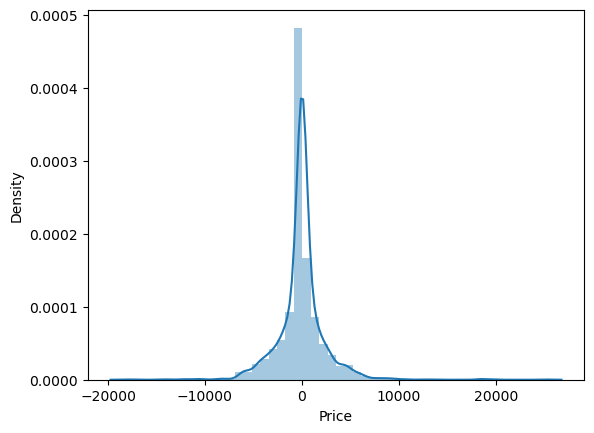

In [131]:
predict(DecisionTreeRegressor())

In [132]:
from sklearn.model_selection import RandomizedSearchCV

In [133]:
rf=RandomForestRegressor()

In [134]:
n_estimators=[int(x) for x in np.linspace(start=100 ,stop=1200,num=6)]

max_features=["auto" , "sqrt"]

max_depth=[int(x) for x in np.linspace(start=5 ,stop=30,num=4)]

min_samples_split=[5,10,15,100]

In [135]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [136]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [137]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid , cv=3, n_jobs=1 , verbose=2)

In [138]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=   7.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=   8.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time=   8.2s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=540; total time=   4.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=540; total time=   4.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=540; total time=   4.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=540; total time=   3.6s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=540; total time=   3.6s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=540; total time=   3.5s
[CV] END max_depth=13, max_features=sqr

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [139]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [140]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=10, n_estimators=540)

In [141]:
rf_random.best_score_

0.8180478970608457

Training score: 0.5794483128817276
predictions are :[12816.72571495  8820.27264273  8909.99897771 ...  4190.62345641
  9411.25977293  8261.70381625]


r2 score : 0.555713367195872
MAE : 2061.784107595206
MSE : 8649194.304132726
RMSE : 2940.951258374189
MAPE : 24.94861105877552


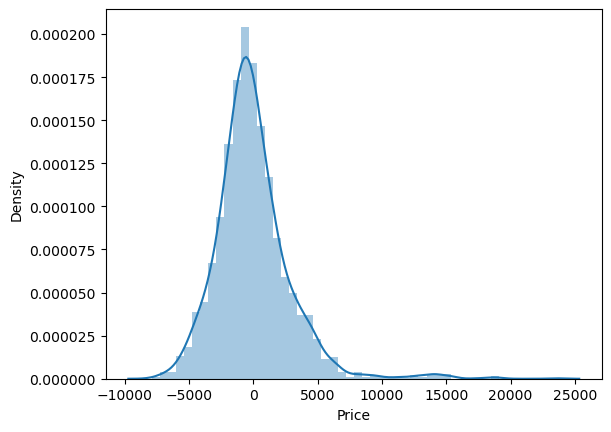

In [142]:
from sklearn.linear_model import LinearRegression

predict(LinearRegression())

Training score: 0.9665246167285146
predictions are :[15932.04954746  5137.16845723  8592.8235391  ...  3713.20156798
  7063.12778156  7790.44653738]


r2 score : 0.5730329866895649
MAE : 1900.7097673107676
MSE : 8312022.885471931
RMSE : 2883.0579053275933
MAPE : 21.215507259581752


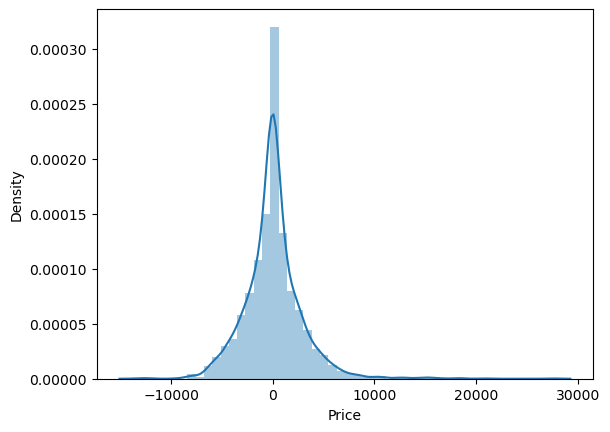

In [143]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


predict(KNeighborsRegressor(n_neighbors=3,
   
    weights='distance',
    algorithm='ball_tree',
    leaf_size=40,
    p=4,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,))